In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# These are the paths to the data. These differ per user. 
test = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/test.csv', 
                   delimiter=',')
train = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/train.csv', 
                    delimiter=',')

The following code is to prepare the data to be optimized. Takes the csv files test and train and transforms it into the x_train, x_test, y_train and y_test we can use for the GridSearchCV. This code is based on the code that is used in the 10 classifiershowdown from kaggle but adapted to our needs, as well as the use of updated packages.

In [3]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

In [4]:
sss = StratifiedShuffleSplit(test_size=0.2, random_state=23)
sss.get_n_splits(train.values, labels)

for train_index, test_index in sss.split(train.values, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

The following code is the actual gridseach on the parameters for KNeighbors, DecisionTrees and AdaBoost.

In [69]:
# These are the parameters we are going to optimize using gridseach, there are multiple parameters
# as finding the most suited ranges for the hyperparameters are trial and error. I keep these variables
# to show the process.
parameters_KN = [{'n_neighbors':range(1, 10), 'weights':['uniform', 'distance']}]
parameters_KN_more = [{'n_neighbors':range(1, 50), 'weights':['uniform', 'distance']}]
parameters_DT = [{'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'min_samples_leaf':[1, 2]}]
parameters_DT_more = [{'criterion':['gini', 'entropy'], 'min_samples_leaf':range(1,10)}]
parameters_AB = [{'n_estimators':range(25,75), 'learning_rate':[0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]}]
parameters_AB_low = [{'n_estimators':range(25,75), 'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]}] 
parameters_AB_lower = [{'n_estimators':range(25,75), 'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07, 0.08, 0.09]}] 

In [6]:
# GRIDSEARCH KNEIGHBORS
print("# Tuning hyper-parameters for accuracy")
    
clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3, weights='uniform', n_jobs=-1), parameters_KN, cv=5,
                   scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_KN = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_KN.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_neighbors': 1, 'weights': 'uniform'}


In [32]:
# GRIDSEACH KNEIGHBORS MORE 
print("# Tuning hyper-parameters for accuracy")
    
clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3, weights='uniform', n_jobs=-1), parameters_KN_more, cv=5,
                   scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_KN_more = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_KN_more.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_neighbors': 1, 'weights': 'uniform'}


In [7]:
# GRIDSEACH DECISION TREE
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1), 
                      parameters_DT, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_DT = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_DT.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'splitter': 'best', 'criterion': 'entropy', 'min_samples_leaf': 1}


In [70]:
# GRIDSEACH DECISION TREE MORE
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1), 
                      parameters_DT_more, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_DT_more = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_DT_more.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'criterion': 'gini', 'min_samples_leaf': 1}


In [36]:
# GRIDSEACH ADABOOST
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1.0), parameters_AB, 
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_AB = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_AB.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_estimators': 67, 'learning_rate': 0.7}


In [38]:
# GRIDSEACH ADABOOST LOW
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1.0), parameters_AB_low, 
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_AB_low = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_AB_low.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_estimators': 70, 'learning_rate': 0.1}


In [8]:
# GRIDSEACH ADABOOST LOWER
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1.0), parameters_AB_lower, 
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_AB_lower = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_AB_lower.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_estimators': 74, 'learning_rate': 0.03}


The following code is just to visualise the 'learning curves'

In [11]:
%matplotlib inline

In [66]:
# KNEIGHBORS MORE preparing for splitting the visualization for uniform and distance as weights.
grid_scores_KN_more_u = [x for x in Grid_scores_KN_more if 'uniform' in x]
the_x_u = [int(a.split(' ')[1][:-1]) for a in [x.split('{')[1][:-1] for x in grid_scores_KN_more_u]]
the_y_u = [float(x.split(' ')[0]) for x in grid_scores_KN_more_u]

grid_scores_KN_more_d = [x for x in Grid_scores_KN_more if 'distance' in x]
the_x_d = [int(a.split(' ')[1][:-1]) for a in [x.split('{')[1][:-1] for x in grid_scores_KN_more_d]]
the_y_d = [float(x.split(' ')[0]) for x in grid_scores_KN_more_d]

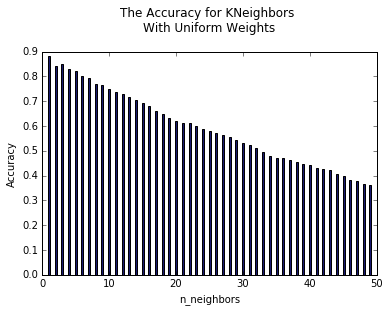

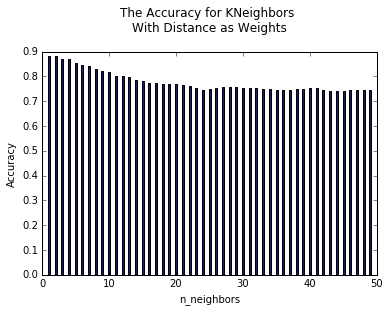

In [68]:
# KNEIGHBORS MORE splitting the visualization for uniform and distance as weights.

# Uniform
ax = plt.subplot(111)
ax.bar(the_x_u, the_y_u, width=0.3, color='midnightblue', align='center')

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('n_neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for KNeighbors \nWith Uniform Weights\n')

plt.show()

# Distance
ax = plt.subplot(111)
ax.bar(the_x_d, the_y_d, width=0.3, color='midnightblue', align='center')

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('n_neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for KNeighbors \nWith Distance as Weights\n')

plt.show()

In [82]:
# DECISION TREE MORE preparing for splitting the visualization for gini or entropy.
grid_scores_DT_more_g = [x for x in Grid_scores_DT_more if 'gini' in x]
the_x_g = [a.split(' ')[-1] for a in [x.split('{')[1][:-1] for x in grid_scores_DT_more_g]]
the_y_g = [float(x.split(' ')[0]) for x in grid_scores_DT_more_g]

grid_scores_DT_more_e = [x for x in Grid_scores_DT_more if 'entropy' in x]
the_x_e = [a.split(' ')[-1] for a in [x.split('{')[1][:-1] for x in grid_scores_DT_more_e]]
the_y_e = [float(x.split(' ')[0]) for x in grid_scores_DT_more_e]

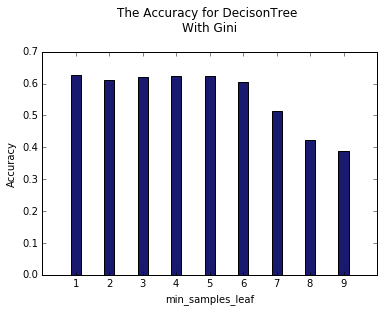

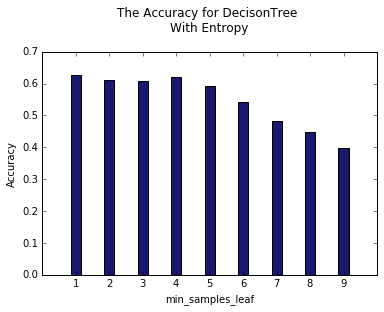

In [89]:
# DECISION TREE MORE splitting the visualization for gini or entropy.

# Gini
numbers = range(len(the_x_g))
ax = plt.subplot(111)
ax.bar(numbers, the_y_g, width=0.3, color='midnightblue', align='center')
plt.xticks(numbers, the_x_g)

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for DecisonTree \nWith Gini\n')

plt.show()

# Entropy
ax = plt.subplot(111)
ax.bar(numbers, the_y_e, width=0.3, color='midnightblue', align='center')
plt.xticks(numbers, the_x_e)

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for DecisonTree \nWith Entropy\n')

plt.show()

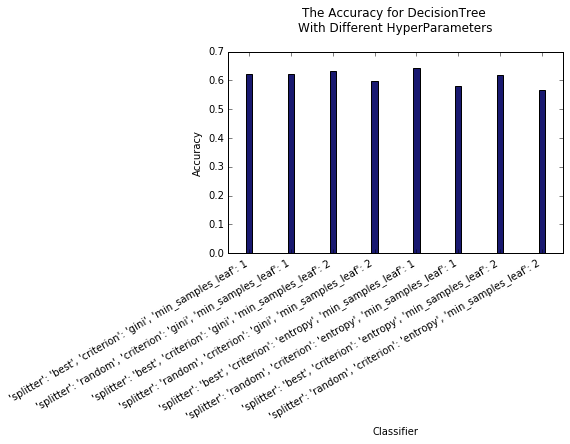

In [88]:
# Original Plot Decision Tree, so splitter included

the_y = [x.split(' ')[0] for x in Grid_scores_DT]
the_x = [x.split('{')[1][:-1] for x in Grid_scores_DT]

Number = range(2*len(the_y))[1::2]

fig, ax = plt.subplots()

ax = plt.subplot(111)
ax.bar(Number, the_y, width=0.3, color='midnightblue', align='center')
plt.xticks(Number, the_x)

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for DecisionTree \nWith Different HyperParameters\n')

fig.autofmt_xdate()

plt.show()

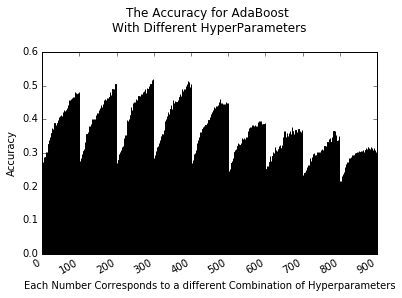

In [87]:
# Plotting the learning curve for adaboost with the lowest values. 

the_y = [x.split(' ')[0] for x in Grid_scores_AB_lower]
the_x = [x.split('{')[1][:-1] for x in Grid_scores_AB_lower]

Number = range(2*len(the_y))[1::2]

fig, ax = plt.subplots()

ax = plt.subplot(111)
ax.bar(Number, the_y, width=0.3, color='midnightblue', align='center')

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('Each Number Corresponds to a different Combination of Hyperparameters')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for AdaBoost \nWith Different HyperParameters\n')

fig.autofmt_xdate()

plt.show()